# Trajectory Inspection Notebook

This notebook helps you inspect and visualize recorded robot trajectories.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [39]:
# Load trajectory file
trajectory_file = "data/demo1.npz"  # Change this to your trajectory file

data = np.load(trajectory_file, allow_pickle=True)

# Extract data
timestamps = data['timestamps']
states = data['states']
actions = data['actions']
metadata = data['metadata'].item() if 'metadata' in data else {}

print("Trajectory loaded successfully!")
print(f"\nFile: {trajectory_file}")
print(f"Number of samples: {len(timestamps)}")
print(f"Duration: {timestamps[-1]:.2f} seconds")
print(f"\nState shape: {states.shape}")
print(f"Action shape: {actions.shape}")
print(f"\nMetadata:")
for key, value in metadata.items():
    print(f"  {key}: {value}")

Trajectory loaded successfully!

File: data/demo1.npz
Number of samples: 402
Duration: 20.07 seconds

State shape: (402, 6)
Action shape: (402, 7)

Metadata:
  num_samples: 402
  control_frequency: 20.0
  duration_seconds: 20.072432392000337
  state_dim: 6
  action_dim: 7
  state_labels: ['joint_0', 'joint_1', 'joint_2', 'joint_3', 'joint_4', 'gripper']
  action_labels: ['vx', 'vy', 'vz', 'wx', 'wy', 'wz', 'gripper_target']
  timestamp: 2025-12-14T00:49:03.889726


In [40]:
# Inspect state data (joint positions)
print("State data (joint positions):")
print(f"  Shape: {states.shape}")
print(f"  Columns: {metadata.get('state_labels', ['joint_0', 'joint_1', 'joint_2', 'joint_3', 'joint_4', 'gripper'])}")
print(f"\nFirst 5 samples:")
print(states[:5])
print(f"\nStatistics:")
print(f"  Min: {states.min(axis=0)}")
print(f"  Max: {states.max(axis=0)}")
print(f"  Mean: {states.mean(axis=0)}")

State data (joint positions):
  Shape: (402, 6)
  Columns: ['joint_0', 'joint_1', 'joint_2', 'joint_3', 'joint_4', 'gripper']

First 5 samples:
[[ 0.47258146  1.02341504 -0.80246787 -0.96664389  0.03682453 -0.02518817]
 [ 0.47258146  1.02341504 -0.80246787 -0.96664389  0.03682453 -0.02518817]
 [ 0.47321248  1.00325152 -0.78793541 -0.97599639  0.02391636 -0.02518817]
 [ 0.47436548  0.98419732 -0.77392314 -0.98529378  0.00951229 -0.02518817]
 [ 0.47533738  0.96567631 -0.75998822 -0.9949101  -0.0055283  -0.02518817]]

Statistics:
  Min: [-0.0650955  -0.08510858 -0.85323449 -1.54710356 -0.50286603 -0.02518817]
  Max: [ 0.57860487  1.02341504 -0.06765674 -0.78390953  0.82424    -0.01018817]
  Mean: [ 0.25478573  0.17706133 -0.41547104 -1.12789234  0.10934017 -0.0151322 ]


In [41]:
# Inspect action data (velocity commands)
print("Action data (velocity commands):")
print(f"  Shape: {actions.shape}")
print(f"  Columns: {metadata.get('action_labels', ['vx', 'vy', 'vz', 'wx', 'wy', 'wz'])}")
print(f"\nFirst 5 samples:")
print(actions[:5])
print(f"\nStatistics:")
print(f"  Min: {actions.min(axis=0)}")
print(f"  Max: {actions.max(axis=0)}")
print(f"  Mean: {actions.mean(axis=0)}")

Action data (velocity commands):
  Shape: (402, 7)
  Columns: ['vx', 'vy', 'vz', 'wx', 'wy', 'wz', 'gripper_target']

First 5 samples:
[[ 0.          0.          0.          0.          0.          0.
  -0.02518817]
 [ 0.02571429 -0.01785714  0.          0.34        0.17142857 -0.15428571
  -0.02518817]
 [ 0.02357143 -0.01785714  0.          0.34        0.15714286 -0.20285714
  -0.02518817]
 [ 0.02285714 -0.01642857  0.          0.34        0.15428571 -0.21714286
  -0.02518817]
 [ 0.02142857 -0.01571429  0.          0.34285714  0.15714286 -0.21714286
  -0.02518817]]

Statistics:
  Min: [-0.09142857 -0.05642857 -0.11142857 -0.08       -0.62285714 -0.52571429
 -0.02518817]
  Max: [ 0.04571429  0.08785714  0.13714286  0.44285714  0.53714286  0.68857143
 -0.01018817]
  Mean: [ 0.0024769   0.00339197 -0.0043177   0.05884861  0.00331201  0.04739872
 -0.0151322 ]


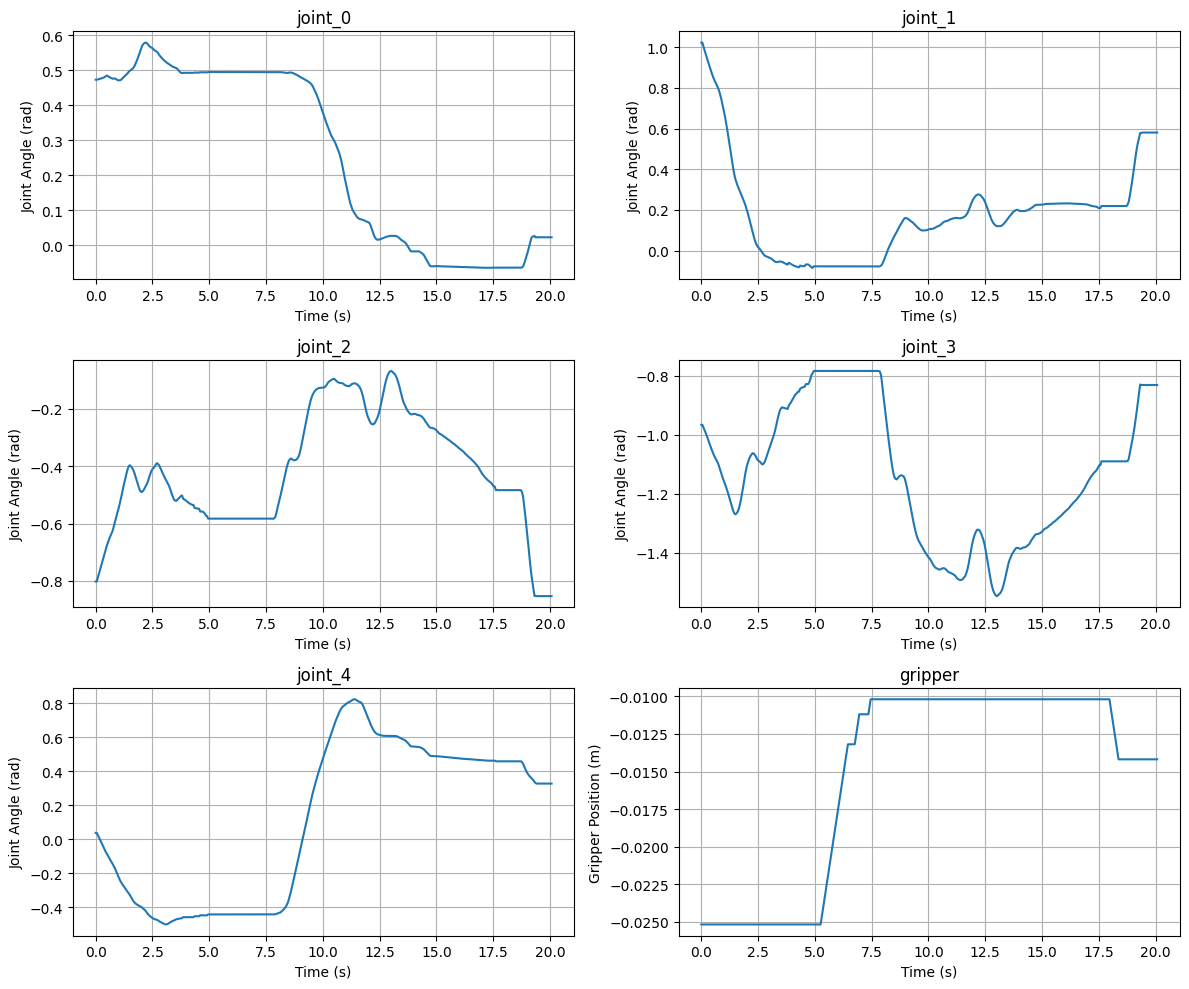

In [42]:
# Plot joint positions over time
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

state_labels = metadata.get('state_labels', ['joint_0', 'joint_1', 'joint_2', 'joint_3', 'joint_4', 'gripper'])

for i in range(6):
    axes[i].plot(timestamps, states[:, i])
    axes[i].set_title(f"{state_labels[i]}")
    axes[i].set_xlabel("Time (s)")
    if i < 5:
        axes[i].set_ylabel("Joint Angle (rad)")
    else:
        axes[i].set_ylabel("Gripper Position (m)")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

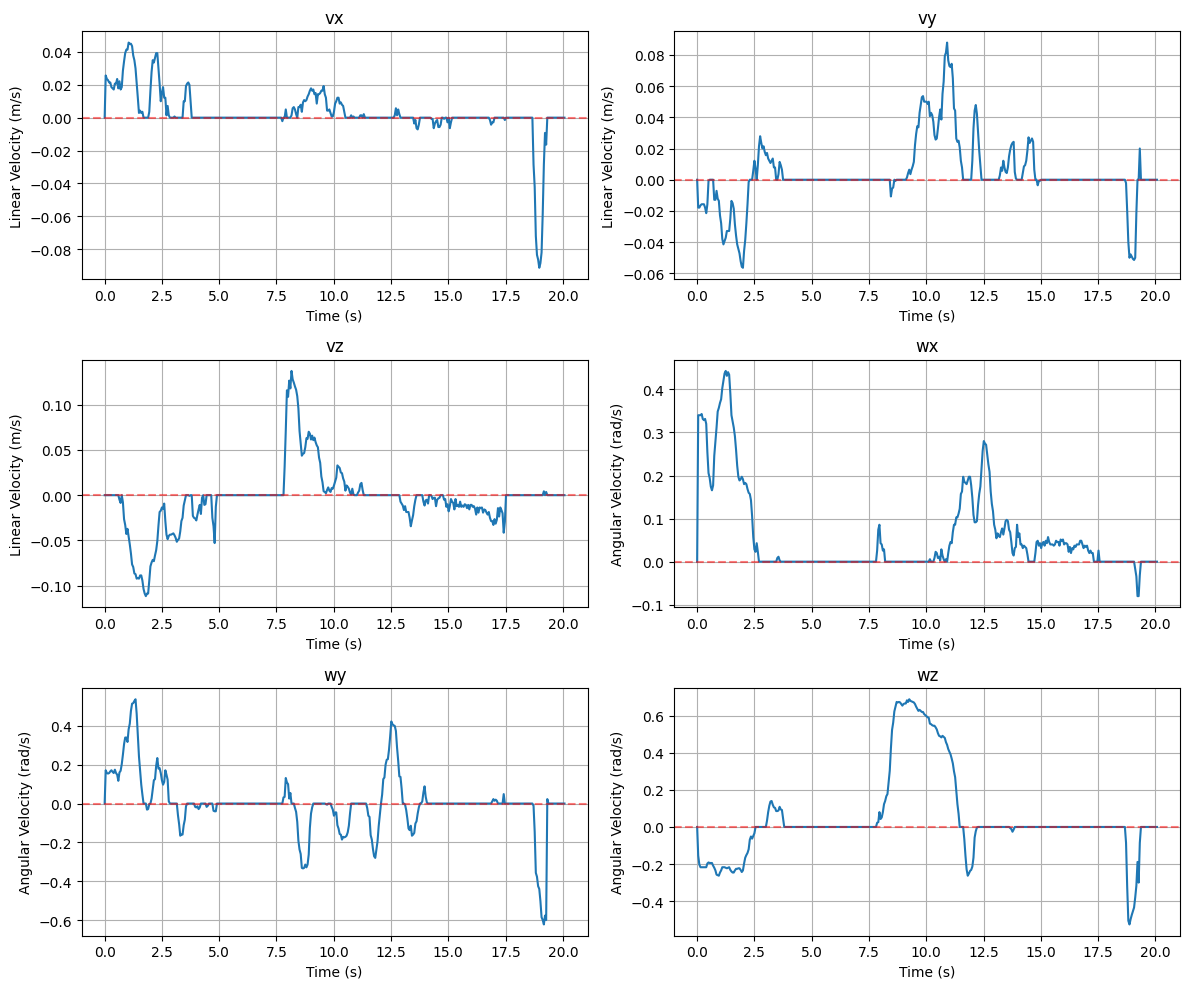

In [43]:
# Plot velocity commands over time
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

action_labels = metadata.get('action_labels', ['vx', 'vy', 'vz', 'wx', 'wy', 'wz'])

for i in range(6):
    axes[i].plot(timestamps, actions[:, i])
    axes[i].set_title(f"{action_labels[i]}")
    axes[i].set_xlabel("Time (s)")
    if i < 3:
        axes[i].set_ylabel("Linear Velocity (m/s)")
    else:
        axes[i].set_ylabel("Angular Velocity (rad/s)")
    axes[i].grid(True)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

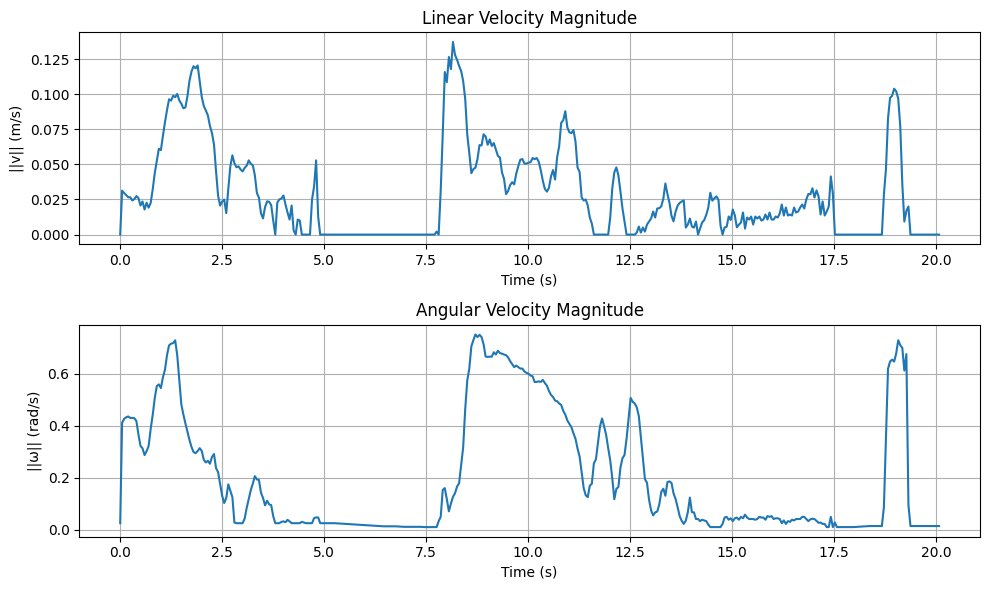

In [44]:
# Plot velocity magnitude over time
linear_velocity_magnitude = np.linalg.norm(actions[:, :3], axis=1)
angular_velocity_magnitude = np.linalg.norm(actions[:, 3:], axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(timestamps, linear_velocity_magnitude)
ax1.set_title("Linear Velocity Magnitude")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("||v|| (m/s)")
ax1.grid(True)

ax2.plot(timestamps, angular_velocity_magnitude)
ax2.set_title("Angular Velocity Magnitude")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("||ω|| (rad/s)")
ax2.grid(True)

plt.tight_layout()
plt.show()

Sampling statistics:
  Mean dt: 50.06 ms
  Actual frequency: 19.98 Hz
  Expected frequency: 20.0 Hz
  Min dt: 46.20 ms
  Max dt: 50.27 ms
  Std dt: 0.21 ms


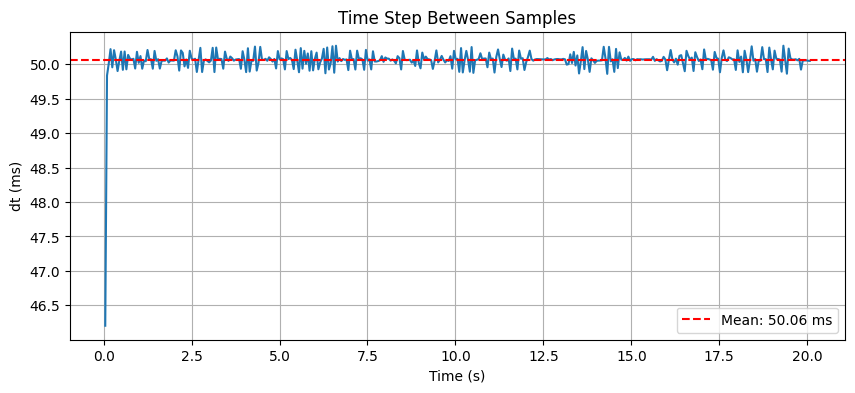

In [45]:
# Check sampling frequency
dt = np.diff(timestamps)
mean_dt = np.mean(dt)
actual_frequency = 1.0 / mean_dt

print(f"Sampling statistics:")
print(f"  Mean dt: {mean_dt*1000:.2f} ms")
print(f"  Actual frequency: {actual_frequency:.2f} Hz")
print(f"  Expected frequency: {metadata.get('control_frequency', 50.0):.1f} Hz")
print(f"  Min dt: {dt.min()*1000:.2f} ms")
print(f"  Max dt: {dt.max()*1000:.2f} ms")
print(f"  Std dt: {dt.std()*1000:.2f} ms")

plt.figure(figsize=(10, 4))
plt.plot(timestamps[1:], dt * 1000)
plt.xlabel("Time (s)")
plt.ylabel("dt (ms)")
plt.title("Time Step Between Samples")
plt.grid(True)
plt.axhline(y=mean_dt*1000, color='r', linestyle='--', label=f'Mean: {mean_dt*1000:.2f} ms')
plt.legend()
plt.show()

In [46]:
# Summary statistics
print("="*60)
print("TRAJECTORY SUMMARY")
print("="*60)
print(f"File: {trajectory_file}")
print(f"Duration: {timestamps[-1]:.2f} seconds")
print(f"Number of samples: {len(timestamps)}")
print(f"Control frequency: {actual_frequency:.2f} Hz")
print(f"\nState ranges:")
for i, label in enumerate(state_labels):
    print(f"  {label:15s}: [{states[:, i].min():8.4f}, {states[:, i].max():8.4f}]")
print(f"\nAction ranges:")
for i, label in enumerate(action_labels):
    print(f"  {label:15s}: [{actions[:, i].min():8.4f}, {actions[:, i].max():8.4f}]")

TRAJECTORY SUMMARY
File: data/demo1.npz
Duration: 20.07 seconds
Number of samples: 402
Control frequency: 19.98 Hz

State ranges:
  joint_0        : [ -0.0651,   0.5786]
  joint_1        : [ -0.0851,   1.0234]
  joint_2        : [ -0.8532,  -0.0677]
  joint_3        : [ -1.5471,  -0.7839]
  joint_4        : [ -0.5029,   0.8242]
  gripper        : [ -0.0252,  -0.0102]

Action ranges:
  vx             : [ -0.0914,   0.0457]
  vy             : [ -0.0564,   0.0879]
  vz             : [ -0.1114,   0.1371]
  wx             : [ -0.0800,   0.4429]
  wy             : [ -0.6229,   0.5371]
  wz             : [ -0.5257,   0.6886]
  gripper_target : [ -0.0252,  -0.0102]


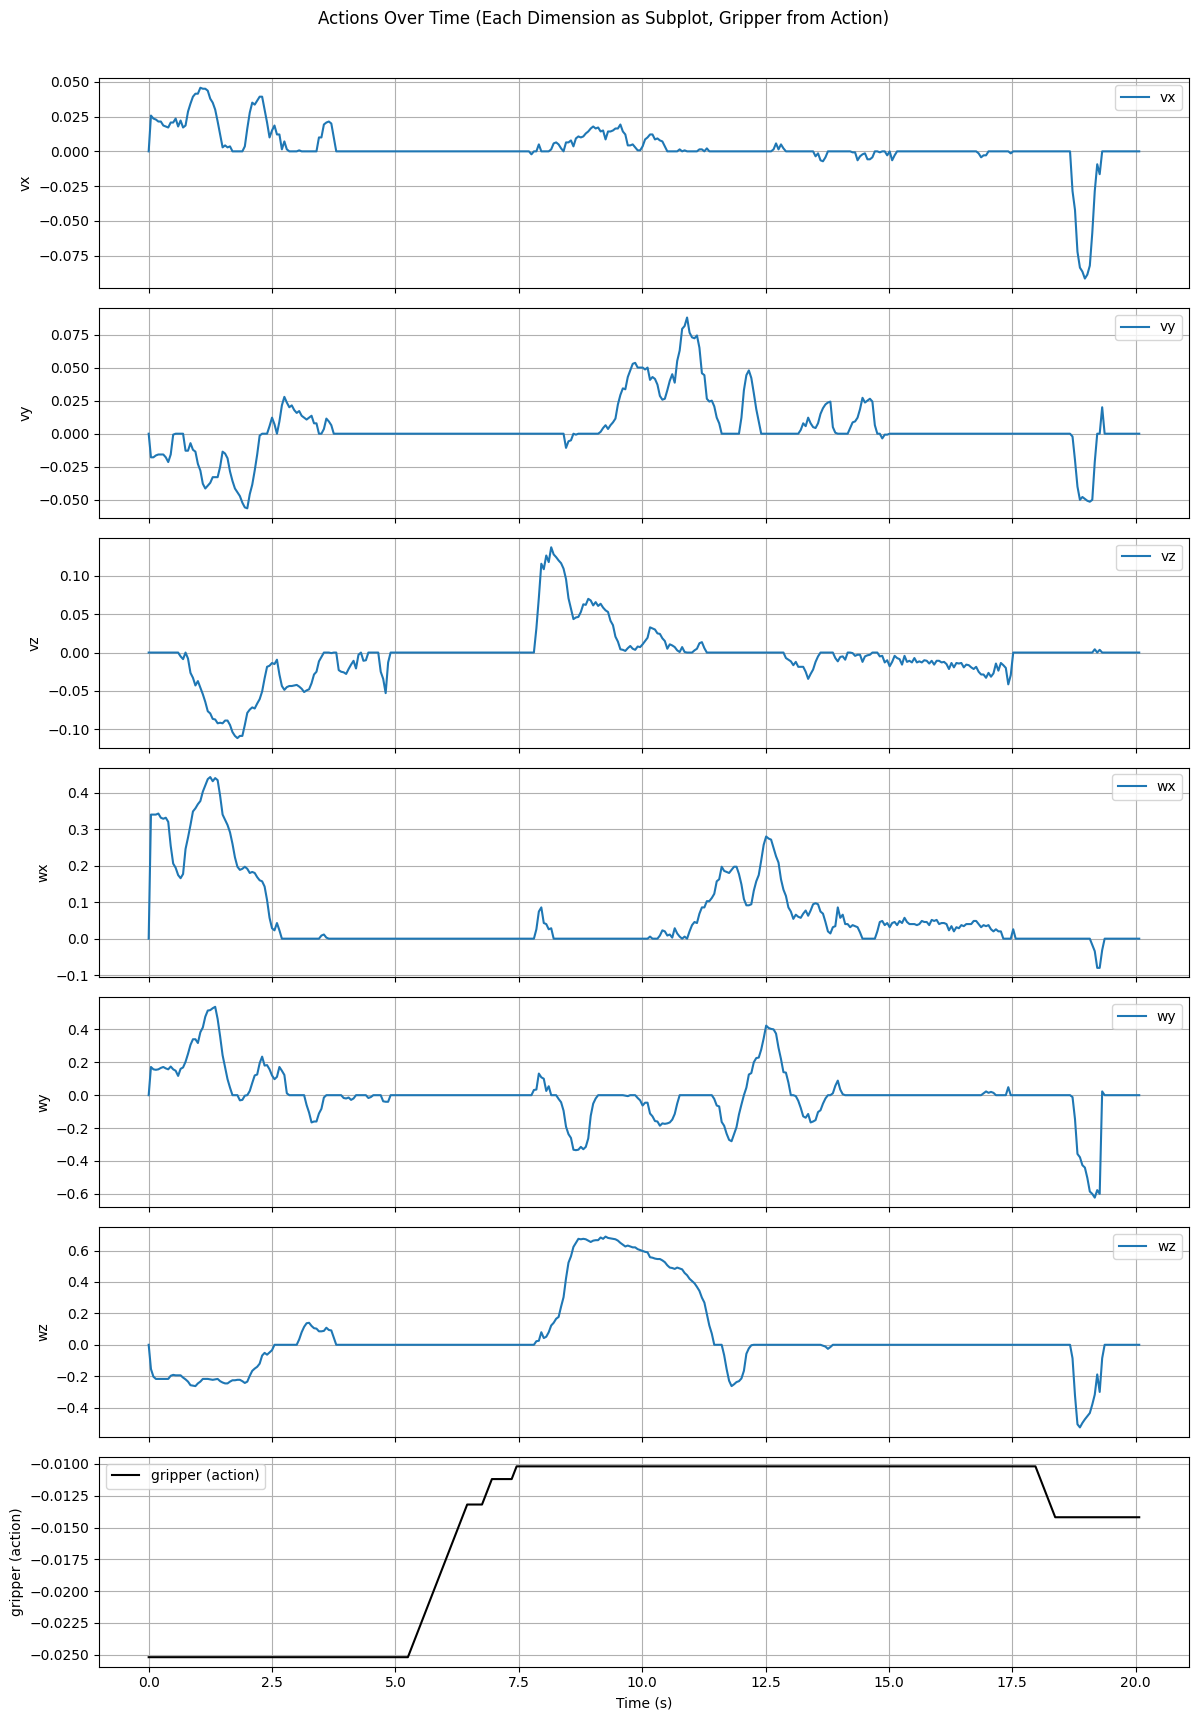

In [47]:
# Plot each action dimension as a subplot, treating "gripper" as an action (not state)
num_actions = actions.shape[1]
gripper_in_action = 'gripper' in action_labels

# Identify gripper action dimension
if gripper_in_action:
    gripper_action_idx = action_labels.index('gripper')
else:
    # Assume last column is gripper if not explicitly labeled (legacy support)
    gripper_action_idx = num_actions - 1

# Exclude gripper from the first (non-gripper) action subplots for clarity
non_gripper_action_indices = [i for i in range(num_actions) if i != gripper_action_idx]
n_non_gripper = len(non_gripper_action_indices)

# Always add separate gripper action subplot
nplots = n_non_gripper + 1
fig, axs = plt.subplots(nplots, 1, figsize=(12, 2.5 * nplots), sharex=True)

if nplots == 1:
    axs = [axs]  # Make iterable

# Plot non-gripper action dimensions
for ax_idx, i in enumerate(non_gripper_action_indices):
    axs[ax_idx].plot(timestamps, actions[:, i], label=action_labels[i])
    axs[ax_idx].set_ylabel(action_labels[i])
    axs[ax_idx].legend()
    axs[ax_idx].grid(True)

# Plot gripper action as final subplot
axs[-1].plot(timestamps, actions[:, gripper_action_idx], label='gripper (action)', color='k')
axs[-1].set_ylabel('gripper (action)')
axs[-1].legend()
axs[-1].grid(True)

axs[-1].set_xlabel("Time (s)")
fig.suptitle("Actions Over Time (Each Dimension as Subplot, Gripper from Action)")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


(472, 7)